**Trabalho prático de K-Means** 

**Disciplina**: Algoritmos e Estruturas de Dados II (2020/02)

**Giovanna Souza Teodoro** - 1915080065

**Victor Hugo Santos de Lima** - 1915080025

*Antes de executar as células, favor montar o drive com o código abaixo.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*É possível também fazer upload dos arquivos necessários pela célula abaixo.*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving routers.txt to routers.txt


# Setup do Ambiente

In [ ]:
'''
  Conjunto de bibliotecas necessárias ao longo da execução das células
'''
import matplotlib.pyplot as plt       
%matplotlib inline
import numpy as np                    
import pandas as pd                    
import seaborn as sns                 
import networkx as nx                 
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from nltk.stem.porter import PorterStemmer

'''
  Descomente a linha a partir do método pelo qual optou 
'''
# PELO DRIVE
# dataframeRouters = pd.read_csv('/content/drive/Shareddrives/AED3TeodoroHugo/routers.txt', names=["category", "instances"])


# PELO UPLOAD
dataframeRouters = pd.read_csv('./routers.txt', names=["category", "instances"])



# Construção dos Gabaritos

In [ ]:
gabaritos = {}

aux = ""

count = 0

for i in dataframeRouters["category"]:
    if aux != i:
        aux = i
        gabaritos[aux] = []
    
    gabaritos[aux].append(dataframeRouters["instances"][count])
    count += 1

In [ ]:
palavras = []

# Criação de um array com todas as sentenças

for i in dataframeRouters["instances"]:
    palavras.append(i)

In [ ]:
palavras2 = [[i] for i in palavras]

# Similaridade entre palavras

In [ ]:
nlp = en_core_web_lg.load()

NameError: ignored

In [ ]:
file = open("similaridades.txt", "w+")

for i in range(len(palavras) - 1):
    for j in range(i + 1, len(palavras)):
        word1 = nlp(palavras[i])
        word2 = nlp(palavras[j])
        
        similaridade = word1.similarity(word2)

        file.write(palavras[i] + "," + palavras[j] + "," + str(similaridade) + "\n")
file.close()

# TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(palavras)
feature_names = vectorizer.get_feature_names()

In [ ]:
k = 9

model = KMeans(n_clusters=k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
from sklearn.decomposition import PCA

kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)

scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r","b","w","c","m","y","g","p","o"]

x = [o[0] for o in scatter_plot_points]
y = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x, y)

#for i, txt in enumerate(palavras):
#    ax.annotate(txt, (x[i], y[i]))

# Teste 1

In [ ]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(palavras)
feature_names = vectorizer.get_feature_names()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(vectors)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9).fit(vectors)

clusters = kmeans.labels_.tolist()

y_kmeans = kmeans.predict(vectors)

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#cd5fec', 6: '#38f3ec', 7: '#38f349', 8: '#000000'}

cluster_names = {0: 'general', 
                 1: 'battery', 
                 2: 'software', 
                 3: 'camera', 
                 4: 'dimension',
                 5: 'display',
                 6: 'memory',
                 7: 'price',
                 8: 'processor'}

In [ ]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')

df['titles'] = palavras

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film titl  
    
plt.show()

# Teste 2 - Word2Vec

In [ ]:
model = Word2Vec(palavras2, min_count=1)

X = model[model.wv.vocab]

In [ ]:
kmeans = KMeans(n_clusters=9, max_iter=300).fit(X)
dataframeRouters['cluster'] = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
pca = PCA(n_components=2)

pca_result = pca.fit_transform(X)

dataframeRouters['x'] = pca_result[:, 0]
dataframeRouters['y'] = pca_result[:, 1]

# Teste 3 - Word2Vec

In [ ]:
model = Word2Vec(palavras2, min_count=1)

X = model[model.wv.vocab]

In [ ]:
pca = PCA(n_components=2, random_state=42)

pca_result = pca.fit_transform(X)

dataframeRouters['x'] = pca_result[:, 0]
dataframeRouters['y'] = pca_result[:, 1]

In [ ]:
kmeans = KMeans(n_clusters=9, max_iter=300).fit(pca_result)

dataframeRouters['cluster'] = kmeans.predict(pca_result)

centroids = kmeans.cluster_centers_

In [ ]:
colors = ['#5E005E', '#AB11AB', '#5E4C09', '#095E52', '#09AB92', '#B5FF5E', '#7897FF', '#76B330', '#CDD1AE']
dataframeRouters['color'] = dataframeRouters.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7], 8:colors[8]})

In [ ]:
plt.subplots(figsize=(14, 14))

plt.scatter(centroids[:,0], centroids[:,1], c='black', alpha = 0.6, s=400, marker='x')
plt.scatter(dataframeRouters.x, dataframeRouters.y, c=dataframeRouters.color, alpha = 0.6, s=200)

labels = dataframeRouters['instances'].to_list()
x = dataframeRouters['x'].to_list()
y = dataframeRouters['y'].to_list()
 
for i in range(len(x)):
  plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

In [ ]:
resposta = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}

for i in range(len(dataframeRouters)):
    resposta[int(np.array(dataframeRouters['cluster'])[i])].append(np.array(dataframeRouters['instances'])[i])

In [ ]:
resposta[0]

In [ ]:
gabaritos['general']

# Teste 4 - Tf-Idf

In [ ]:
# Tratamento das sentenças utilizando o método de "Stemming"

p_stemmer = PorterStemmer()

palavras3 = []

for word in palavras:
    if(len(word.split()) > 1):
        aux = ''
        for subword in word.split():
            aux += p_stemmer.stem(subword) + ' '
        palavras3.append(aux[:-1])
    elif word == "software/app":
        palavras3.append("softwar/app")
    elif word == "extention":
        palavras3.append("extend")
    else:        
        palavras3.append(p_stemmer.stem(word))

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

# Transformação das sentenças em valores numéricos utilizando o método "TF-IDF"
X = vectorizer.fit_transform(palavras3)

In [ ]:
# Similaridade por cosseno
dist = (1.42 - cosine_similarity(X))

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)

# Redução da dimensionalidade dos valores numéricos para duas dimensões
pos = mds.fit_transform(dist)

In [ ]:
pca = PCA(n_components=2, random_state=42)

pca_result = pca.fit_transform(pos)

# Criação da coluna x e y no dataframe 
dataframeRouters['x'] = pca_result[:, 0]
dataframeRouters['y'] = pca_result[:, 1]

In [ ]:
kmeans = KMeans(n_clusters=9, max_iter=1000, random_state=15).fit(pca_result)

# Criação da coluna "cluster" no dataframe
dataframeRouters['cluster'] = kmeans.predict(pca_result)

# Obtenção de uma matriz com as posições dos centroides 
centroids = kmeans.cluster_centers_

In [ ]:
# Definição das cores de cada cluster
colors = ['#5E005E', '#AB11AB', '#5E4C09', '#095E52', '#09AB92', '#B5FF5E', '#7897FF', '#76B330', '#CDD1AE']
dataframeRouters['color'] = dataframeRouters.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7], 8:colors[8]})

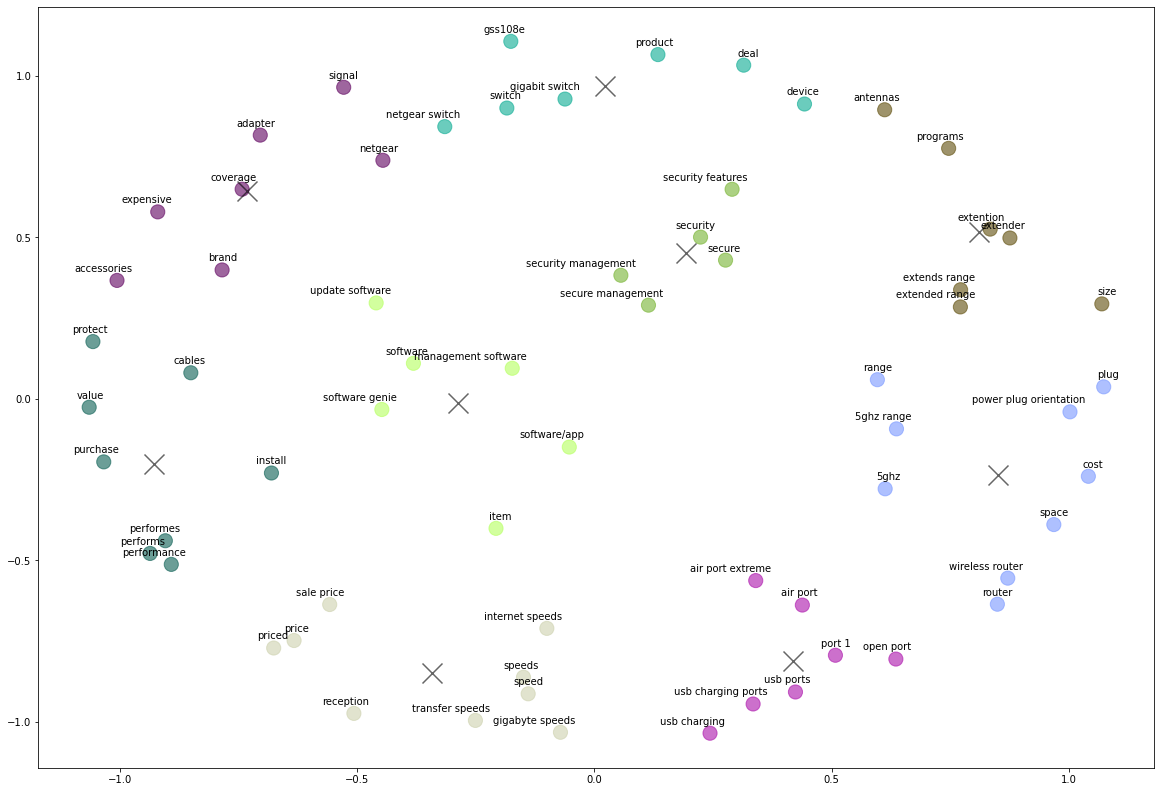

In [ ]:
plt.subplots(figsize=(20, 14))

# Plotagem dos pontos e centroides
plt.scatter(dataframeRouters.x, dataframeRouters.y, c=dataframeRouters.color, alpha = 0.6, s=200)
plt.scatter(centroids[:,0], centroids[:,1], c='black', alpha = 0.6, s=400, marker='x')

labels = dataframeRouters['instances'].to_list()
x = dataframeRouters['x'].to_list()
y = dataframeRouters['y'].to_list()

# Plotagem das labels 
for i in range(len(x)):
    plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(15, 7),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

In [ ]:
dataframeRouters[dataframeRouters.category == 'general']

,category,instances,x,y,cluster,color
6,general,device,0.443004,0.912938,4,#09AB92
7,general,gigabit switch,-0.062158,0.928304,4,#09AB92
8,general,switch,-0.184826,0.900501,4,#09AB92
9,general,deal,0.314778,1.033246,4,#09AB92
10,general,wireless router,0.871805,-0.555078,6,#7897FF
11,general,product,0.133872,1.065988,4,#09AB92
12,general,router,0.849839,-0.635756,6,#7897FF
13,general,purchase,-1.035106,-0.195081,3,#095E52
14,general,brand,-0.785484,0.399246,0,#5E005E
15,general,netgear,-0.446283,0.738676,0,#5E005E


In [ ]:
dataframeRouters

,category,instances,x,y,cluster,color
0,security,security features,0.290279,0.648968,7,#76B330
1,security,security management,0.055705,0.382727,7,#76B330
2,security,security,0.223757,0.500912,7,#76B330
3,security,secure,0.276500,0.429572,7,#76B330
4,security,protect,-1.057949,0.177360,3,#095E52
...,...,...,...,...,...,...
60,coveragearea,extention,0.834703,0.525634,2,#5E4C09
61,coveragearea,extended range,0.771830,0.284689,2,#5E4C09
62,coveragearea,signal,-0.528970,0.964762,0,#5E005E
63,coveragearea,reception,-0.507463,-0.973808,8,#CDD1AE
